<a href="https://colab.research.google.com/github/2303A52336/23CSBTB39-40/blob/main/SML_A12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.utils import resample

# Load your dataset
df = pd.read_csv('breast_cancer_survival.csv')

# Separate features and target
features = df.drop(columns=['Patient_Status'])  # Replace 'target_column' with your actual target column name
target = df['Patient_Status']

# Encode categorical features and target if needed
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

# Convert categorical features to numerical using Label Encoding
for column in features.select_dtypes(include=['object']).columns:
    features[column] = label_encoder.fit_transform(features[column])

# Scale features (important for logistic regression to converge faster)
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [2]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")


SVM Accuracy: 77.61%


In [3]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")



KNN Accuracy: 74.63%


In [4]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {logistic_accuracy * 100:.2f}%")



Logistic Regression Accuracy: 77.61%


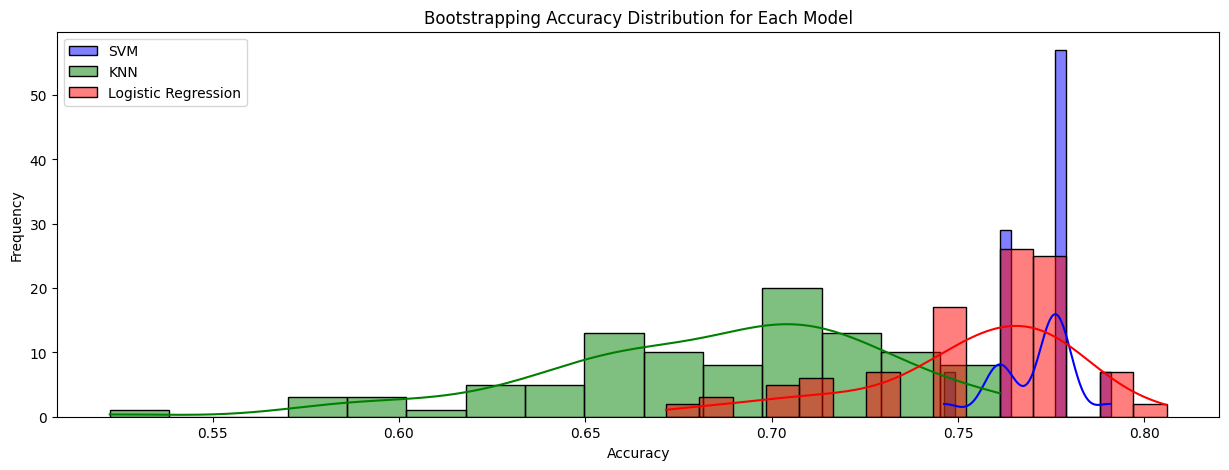

In [5]:
def bootstrap_accuracy(model, X_train, y_train, X_test, y_test, n_iterations=100):
    accuracies = []
    for i in range(n_iterations):
        # Sample with replacement
        X_resample, y_resample = resample(X_train, y_train) # resample is now accessible
        model.fit(X_resample, y_resample)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracies.append(accuracy)
    return accuracies

# Get bootstrapped accuracies for each model
svm_accuracies = bootstrap_accuracy(svm_model, X_train, y_train, X_test, y_test)
knn_accuracies = bootstrap_accuracy(knn_model, X_train, y_train, X_test, y_test)
logistic_accuracies = bootstrap_accuracy(logistic_model, X_train, y_train, X_test, y_test)

# Plot bootstrapped accuracies for each model
plt.figure(figsize=(15, 5))
sns.histplot(svm_accuracies, kde=True, color='blue', label='SVM', bins=15)
sns.histplot(knn_accuracies, kde=True, color='green', label='KNN', bins=15)
sns.histplot(logistic_accuracies, kde=True, color='red', label='Logistic Regression', bins=15)
plt.legend()
plt.title('Bootstrapping Accuracy Distribution for Each Model')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()
